#The n_samples doesnot affect accurecy as it increase or decrease


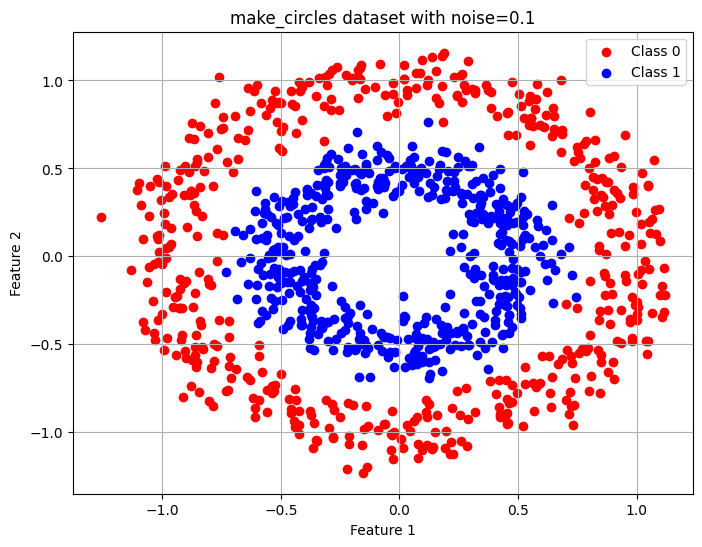

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate the dataset with make_circles
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)

# Plot the dataset to visualize it
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('make_circles dataset with noise=0.1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Using numpy to find unique targets and their counts
unique_targets, counts = np.unique(y, return_counts=True)
print("Using numpy:")
print("Unique target values:", unique_targets)
print("Counts of each target value:", counts)

# Using pandas to find unique targets and their counts
target_series = pd.Series(y)
target_counts = target_series.value_counts()
print("\nUsing pandas:")
print("Unique target values and their counts:\n", target_counts)



Using numpy:
Unique target values: [0 1]
Counts of each target value: [500 500]

Using pandas:
Unique target values and their counts:
 1    500
0    500
Name: count, dtype: int64


In [ ]:
# Convert to pandas DataFrame for better readability (if needed)
import pandas as pd
import numpy as np
# Convert to pandas DataFrame for better readability
df = pd.DataFrame(np.c_[X, y], columns=['Feature 1', 'Feature 2', 'Target'])

# Display the basic features
print("Shape of feature matrix X:", X.shape)
print("Shape of target vector y:", y.shape)
print("\nFirst 5 rows of the dataset:\n")
print(df.head())

# Display some basic statistics of the dataset
print("\nBasic statistics of the dataset:\n")
print(df.describe())

Shape of feature matrix X: (1000, 2)
Shape of target vector y: (1000,)

First 5 rows of the dataset:

   Feature 1  Feature 2  Target
0   0.422494   0.206446     1.0
1  -0.382710   0.158482     1.0
2  -0.568391   0.306051     1.0
3  -0.389914   0.349151     1.0
4   0.454089  -0.890466     0.0

Basic statistics of the dataset:

         Feature 1    Feature 2      Target
count  1000.000000  1000.000000  1000.00000
mean     -0.001493    -0.002680     0.50000
std       0.562217     0.567284     0.50025
min      -1.257779    -1.230499     0.00000
25%      -0.439948    -0.449368     0.00000
50%       0.017176    -0.008701     0.50000
75%       0.438260     0.424125     1.00000
max       1.118057     1.157938     1.00000


In [ ]:
dir(make_circles)

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training+validation and test sets (80% training+validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the training+validation set into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Optional: Convert to pandas DataFrame for better readability (if needed)
df_train = pd.DataFrame(np.c_[X_train, y_train], columns=['Feature 1', 'Feature 2', 'Target'])
df_val = pd.DataFrame(np.c_[X_val, y_val], columns=['Feature 1', 'Feature 2', 'Target'])
df_test = pd.DataFrame(np.c_[X_test, y_test], columns=['Feature 1', 'Feature 2', 'Target'])

print("\nFirst 5 rows of the training dataset:\n", df_train.head())
print("\nFirst 5 rows of the validation dataset:\n", df_val.head())
print("\nFirst 5 rows of the test dataset:\n", df_test.head())


Training set shape: (600, 2) (600,)
Validation set shape: (200, 2) (200,)
Test set shape: (200, 2) (200,)

First 5 rows of the training dataset:
    Feature 1  Feature 2  Target
0  -0.217295  -0.515994     1.0
1  -0.583712  -0.040201     1.0
2   1.114545  -0.318102     0.0
3  -1.012583   0.423840     0.0
4  -1.049774   0.401348     0.0

First 5 rows of the validation dataset:
    Feature 1  Feature 2  Target
0   0.168505   0.869701     0.0
1   0.929839   0.333103     0.0
2   0.125533   0.540246     1.0
3   0.184414   0.765671     0.0
4   0.571016   0.840151     0.0

First 5 rows of the test dataset:
    Feature 1  Feature 2  Target
0   0.522306   0.179113     1.0
1  -0.439845  -0.972623     0.0
2  -0.032335  -0.879170     0.0
3  -0.769146  -0.511790     0.0
4  -0.198139   0.489033     1.0


#The data is non lineary separable this is for test

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train a Linear SVM classifier
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = linear_svm.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy of Linear SVM:", accuracy)

# Optional: Evaluate on the test set
y_test_pred = linear_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy of Linear SVM:", test_accuracy)


Validation Accuracy of Linear SVM: 0.505
Test Accuracy of Linear SVM: 0.555


In [53]:
from sklearn.svm import SVC

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm_rbf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy of rbf SVM:", accuracy)

# Optional: Evaluate on the test set
y_test_pred = svm_rbf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy of rbf SVM:", test_accuracy)


Validation Accuracy of rbf SVM: 1.0
Test Accuracy of rbf SVM: 0.995


In [41]:

# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)  # You can experiment with different degrees
svm_poly.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm_poly.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy of poly SVM:", accuracy)

# Optional: Evaluate on the test set
y_test_pred = svm_poly.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy of poly SVM:", test_accuracy)



Validation Accuracy of poly SVM: 0.615
Test Accuracy of poly SVM: 0.625


In [42]:
# Train SVM with sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm_sigmoid.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy of sigmloid SVM:", accuracy)

# Optional: Evaluate on the test set
y_test_pred = svm_sigmoid.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy of sigmoid SVM:", test_accuracy)

Validation Accuracy of sigmloid SVM: 0.485
Test Accuracy of sigmoid SVM: 0.505


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train a Linear SVM classifier
svcalone = SVC()
svcalone.fit(X_train, y_train)
svcalone.score(X_val,y_val)


1.0

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the validation set
y_val_pred = svm_rbf.predict(X_val)

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the evaluation metrics
print("Evaluation Metrics on Validation Data:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Evaluation Metrics on Validation Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


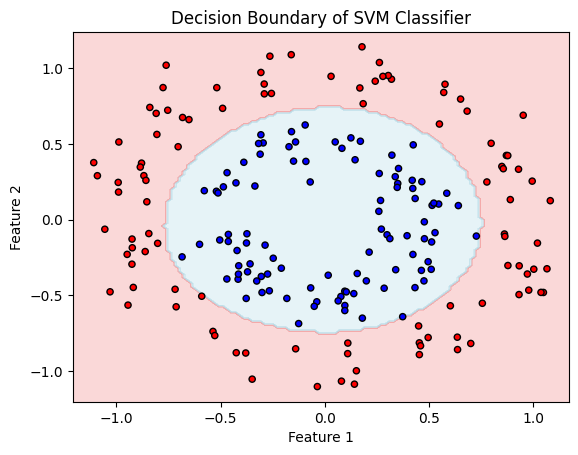

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh

    # Create a mesh grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class labels for the mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['lightcoral', 'lightblue']), alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of SVM Classifier')
    plt.show()

# Plot the decision boundary of the trained SVM classifier
plot_decision_boundary(svm_rbf, X_val, y_val)


#RBF is the best

Accuracy of SVM with poly kernel on validation set: 0.61
Accuracy of SVM with rbf kernel on validation set: 1.00
Accuracy of SVM with sigmoid kernel on validation set: 0.48


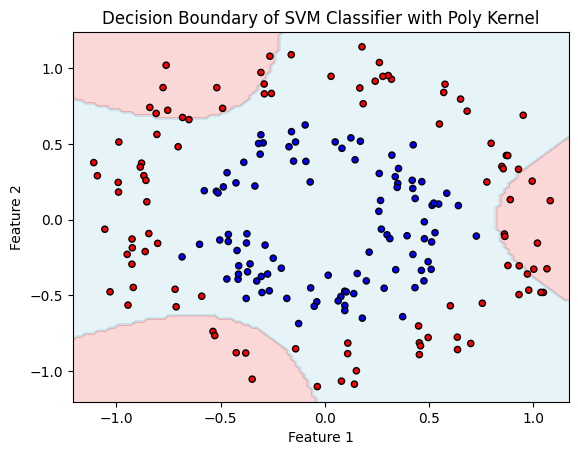

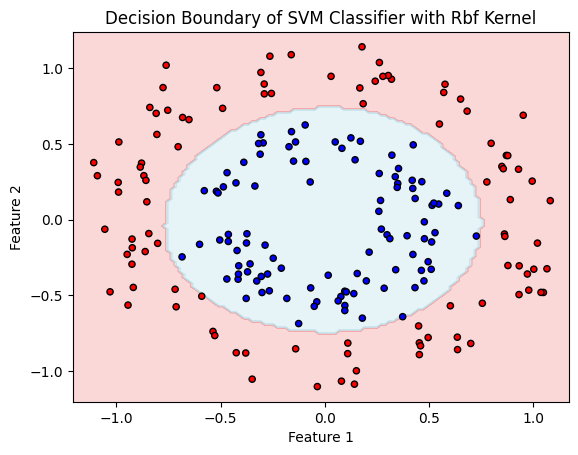

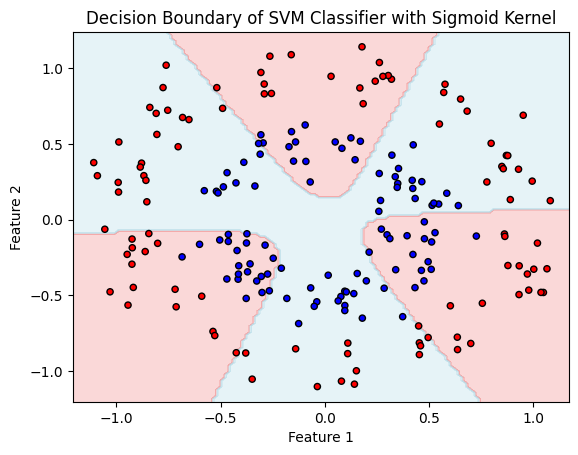

In [56]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Train SVM classifiers with different kernel functions
kernels = ['poly', 'rbf', 'sigmoid']
svm_classifiers = {}

for kernel in kernels:
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)
    svm_classifiers[kernel] = svm_classifier

# Evaluate the trained SVM classifiers on the validation set
for kernel, svm_classifier in svm_classifiers.items():
    y_val_pred = svm_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Accuracy of SVM with {kernel} kernel on validation set: {accuracy:.2f}")

# Define a function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh

    # Create a mesh grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class labels for the mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['lightcoral', 'lightblue']), alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolors='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary of SVM Classifier with {model.kernel.capitalize()} Kernel')
    plt.show()

# Plot the decision boundaries of the trained SVM classifiers on the validation set
for kernel, svm_classifier in svm_classifiers.items():
    plot_decision_boundary(svm_classifier, X_val, y_val)


Best Poly Model - Validation Accuracy: 0.99, Best Params: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best Rbf Model - Validation Accuracy: 0.99, Best Params: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 10, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best Sigmoid Model - Validation Accuracy: 0.60, Best Params: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'sigmoid', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose

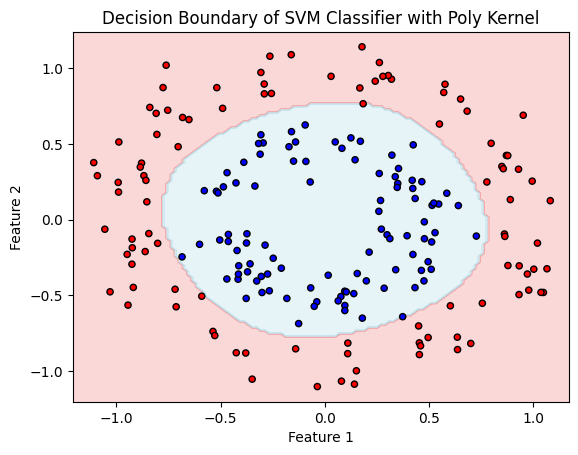

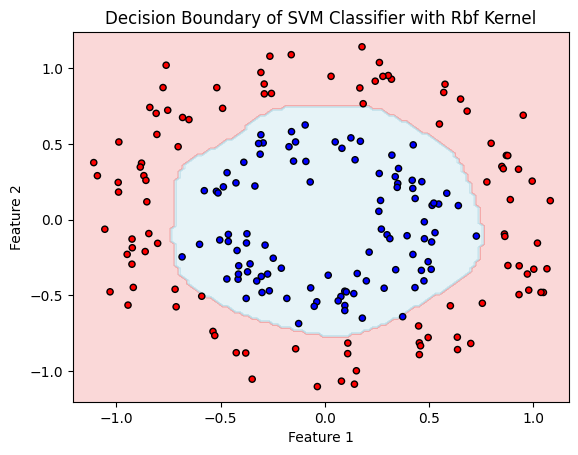

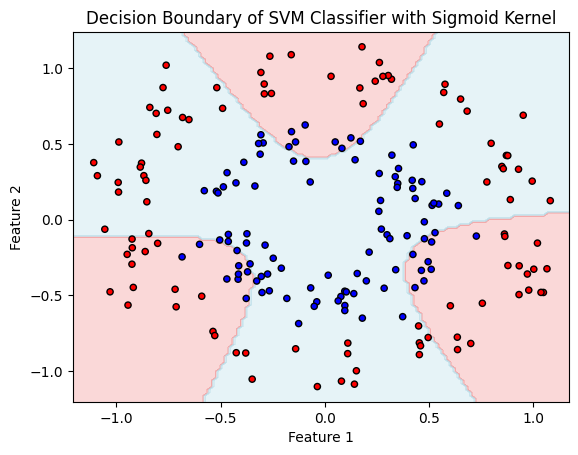

In [67]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'poly': {'degree': [2, 3, 4]},  # Try different polynomial degrees
    'rbf': {'gamma': [0.1, 1, 10]},  # Try different values of gamma for RBF kernel
    'sigmoid': {'gamma': [0.1, 1, 10]}  # Try different values of gamma for the sigmoid kernel
}

# Perform hyperparameter tuning for each kernel type
best_models = {}

for kernel, param in param_grid.items():
    svm_classifier = SVC(kernel=kernel)
    grid_search = GridSearchCV(svm_classifier, param, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[kernel] = grid_search.best_estimator_

# Evaluate the best models on the validation set
for kernel, best_model in best_models.items():
    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Best {kernel.capitalize()} Model - Validation Accuracy: {accuracy:.2f}, Best Params: {best_model.get_params()}")

# Plot the decision boundaries of the best models
for kernel, best_model in best_models.items():
    plot_decision_boundary(best_model, X_val, y_val)


In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Define the degree of polynomial features
degree = 10  # You can adjust this value as needed

# Create polynomial features transformer
poly_features = PolynomialFeatures(degree=degree)

# Create logistic regression model with polynomial features
logistic_regression = make_pipeline(poly_features, LogisticRegression())

# Train the logistic regression model
logistic_regression.fit(X_train, y_train)

# Evaluate the logistic regression model on the validation set
y_val_pred = logistic_regression.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy of Logistic Regression with Polynomial Features on validation set: {accuracy:.2f}")


Accuracy of Logistic Regression with Polynomial Features on validation set: 0.99


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the logistic regression model on the validation set
def evaluate_logistic_regression(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Call the evaluation function for logistic regression model
print("\nEvaluation Metrics for Logistic Regression with Polynomial Features:")
evaluate_logistic_regression(logistic_regression, X_val, y_val)



Evaluation Metrics for Logistic Regression with Polynomial Features:
Evaluation Metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1-score: 0.99


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate the model and print metrics
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Evaluate the logistic regression model
print("\nEvaluation Metrics for Logistic Regression with Polynomial Features:")
evaluate_model(logistic_regression, X_val, y_val)

# Evaluate the SVM classifiers trained with different kernels
print("\nEvaluation Metrics for SVM Classifiers with Different Kernels:")
for kernel, svm_classifier in svm_classifiers.items():
    print(f"\nEvaluation Metrics for SVM with {kernel} kernel:")
    evaluate_model(svm_classifier, X_val, y_val)


# Evaluate the SVM best models trained with different kernels
for kernel, best_model in best_models.items():
    print(f"\nEvaluation Metrics for SVM best models with {kernel} kernel:")
    evaluate_model(best_model, X_val, y_val)



Evaluation Metrics for Logistic Regression with Polynomial Features:
Evaluation Metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1-score: 0.99

Evaluation Metrics for SVM Classifiers with Different Kernels:

Evaluation Metrics for SVM with poly kernel:
Evaluation Metrics:
Accuracy: 0.61
Precision: 0.56
Recall: 1.00
F1-score: 0.72

Evaluation Metrics for SVM with rbf kernel:
Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Evaluation Metrics for SVM with sigmoid kernel:
Evaluation Metrics:
Accuracy: 0.48
Precision: 0.48
Recall: 0.48
F1-score: 0.48

Evaluation Metrics for SVM best models with poly kernel:
Evaluation Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1-score: 1.00

Evaluation Metrics for SVM best models with rbf kernel:
Evaluation Metrics:
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1-score: 0.99

Evaluation Metrics for SVM best models with sigmoid kernel:
Evaluation Metrics:
Accuracy: 0.60
Precision: 0.58
Recall: 0.74
F1-score: 0.

#Areas with higher probabilities correspond to the region where the logistic regression model predicts class 1, while areas with lower probabilities correspond to the region where it predicts class 0.

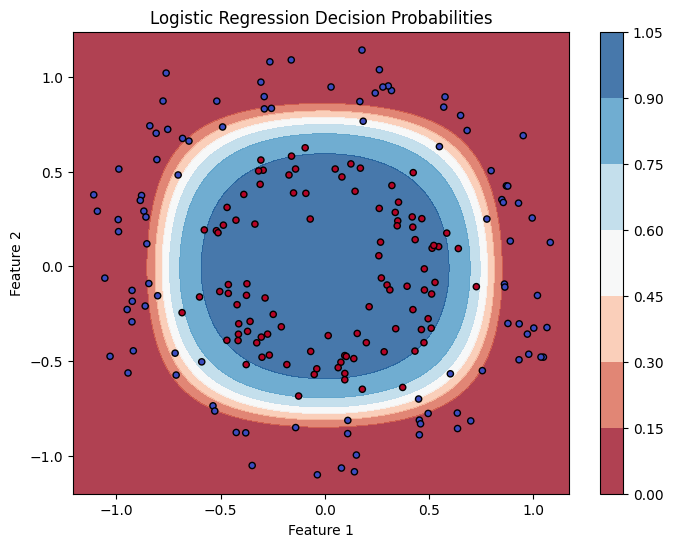

In [76]:
# Define a function to plot predicted probabilities for logistic regression
def plot_logistic_regression_probs(model, X, y):
    plt.figure(figsize=(8, 6))
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.8)
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Probabilities')
    plt.show()

# Plot predicted probabilities for logistic regression
plot_logistic_regression_probs(logistic_regression, X_val, y_val)
